## collect data

In [44]:
import wandb
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd

api = wandb.Api()
decisions = []
timers = []
conflicts = []
restarts = []
successes = []
allnames = []

runs = api.runs(
    'wouterbesse/sudoku-solver',
    {"$and": [ {"tags": '16'} ]},
)
names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
i = 0
with tqdm(runs) as pbar:
    for run in pbar:
        pbar.set_description(run.name)
        try:
            
            curdecisions = run.history(samples=100)["decisions"][0:98]
            decisions.extend(curdecisions)
            name: list[str] = [run.name] * len(curdecisions)
            allnames.extend(name)
            timers.extend(run.history(samples=100)["time"][0:98])
            conflicts.extend(run.history(samples=100)["conflicts"][0:98])
            restarts.extend(run.history(samples=100)["restarts"][0:98])
            successes.extend(run.history(samples=100)["success"][0:98])
            i += 1
        except:
            print(run.name, run.config)
            pass

            # dataPoolMaxFit.append(np.array(Maxfitnesses))
            # dataPoolMeanFit.append(np.array(Meanfitnesses))
            # dataPoolStdFit.append(np.array(Stdfitnesses))
            # dataPoolMaxGain.append(np.array(MaxGains))
            
mydata = pd.DataFrame({
    'names': allnames,
    'decisions': decisions,
    'time': timers,
    'conflicts': conflicts,
    'restarts': restarts,
    'successes': successes
})

mydata.to_csv('./16x16stats.csv', index=False)

  0%|          | 0/8 [00:00<?, ?it/s]

## create charts

C:\Users\woute\AppData\Local\Temp\ipykernel_46468\1214864635.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=mydata, x='names', y=metric, inner='box', order=names.keys(), palette=colors, bw_adjust=0.5, gridsize= 500, ax=ax, log_scale=True)
C:\Users\woute\AppData\Local\Temp\ipykernel_46468\1214864635.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([names[name] for name in names.keys()])
C:\Users\woute\AppData\Local\Temp\ipykernel_46468\1214864635.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=mydata, x='names', y=metric, inner='box', order=names.keys(), pale

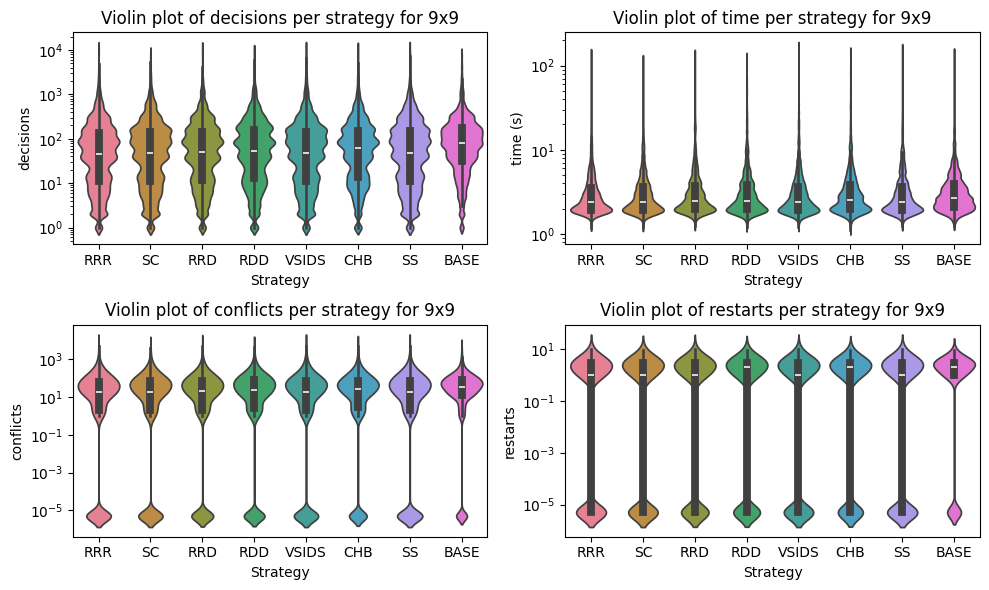

In [41]:
import seaborn as sns

# create a violin plot for each measurement, in this violin plot all 8 algorithms are compared using seaborn
names = {"9x9newrobinre": 'RRR',
         '9x9newsnip': 'SC',
         "9x9newrr": 'RRD',
         "9x9newrandom": 'RDD',
         "9x9newvsids": 'VSIDS',
         "9x9newchb": 'CHB',
         "9x9newsss": 'SS',
         "9x9newranran": 'BASE',
         }

names2 = {"16x16robinre": 'RRR',
         '16x16snip': 'SC',
         "16x16rr": 'RRD',
         "16x16random": 'RDD',
         "16x16vsids": 'VSIDS',
         "16x16chb": 'CHB',
         "16x16sss": 'SS',
         "16x16ranran": 'BASE'
         }

colors = sns.color_palette("husl", 8)

# add a small number to all values to prevent log(0) errors
mydata['decisions'] += 1e-6
mydata['time'] += 1e-6
mydata['conflicts'] += 1e-6
mydata['restarts'] += 1e-6


# create a violin plot for each measurement, make 4 subplots where they fit in
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for ax, metric in zip(axes.flatten(), ['decisions', 'time', 'conflicts', 'restarts']):
    sns.violinplot(data=mydata, x='names', y=metric, inner='box', order=names.keys(), palette=colors, bw_adjust=0.5, gridsize= 500, ax=ax, log_scale=True)
    # sns.violinplot(data=mydata, x='names', y=metric, inner='box', order=names2.keys(), palette=colors, bw_adjust=0.5, gridsize= 500, ax=ax, log_scale=True)
    ax.set_xticklabels([names[name] for name in names.keys()])
    ax.set_title(f"Violin plot of {metric} per strategy for 9x9")
    if metric == 'time':
        ax.set_ylabel(f'{metric} (s)')
    else:
        ax.set_ylabel(f'{metric}')
    # ax.set_yscale('log')
    # if metric == 'decisions':
    #     ax.set_ylim(1e-0, 1e2)
    # elif metric == 'time':
    #     ax.set_ylim(1e-0, 3)
    # elif metric == 'conflicts':
    #     ax.set_ylim(1e-0, 1e1)
    # elif metric == 'restarts':
    #     ax.set_ylim(1e-2, 1)
    ax.set_xlabel('Strategy')

plt.tight_layout()
plt.savefig(f'./violin_plots9.pdf', format='pdf')
plt.show()
    
    

    
# make a histogram of the time per strategy
# plt.figure(figsize=(10, 6))
# plt.title("Histogram of time per strategy")
# plt.hist([mydata[mydata.names == name]['time'] for name in names.keys()], bins=20, label=[names[name] for name in names.keys()])
# plt.ylabel('Frequency')
# plt.xlabel('Time')
# plt.legend()
# # plt.savefig('./timehist.png')
# plt.show()
    

In [38]:
# get the mean and statistical tolerance of each measurement per strategy
mean = mydata.groupby('names').mean()
std = mydata.groupby('names').std()
std.to_csv('./9x9newstats_std.csv')
mean.to_csv('./9x9newstats_mean.csv')

In [39]:
import scipy.stats as stats

stat, p_solve_time = stats.kruskal(mydata[mydata.names == '9x9newrobinre']['time'],
                                   mydata[mydata.names == '9x9newsnip']['time'],
                                    mydata[mydata.names == '9x9newrr']['time'],
                                    mydata[mydata.names == '9x9newrandom']['time'],
                                    mydata[mydata.names == '9x9newvsids']['time'],
                                    mydata[mydata.names == '9x9newchb']['time'],
                                    mydata[mydata.names == '9x9newsss']['time'],
                                    mydata[mydata.names == '9x9newranran']['time'])

stat, p_decisions = stats.kruskal(mydata[mydata.names == '9x9newrobinre']['decisions'],
                                      mydata[mydata.names == '9x9newsnip']['decisions'],
                                        mydata[mydata.names == '9x9newrr']['decisions'],
                                        mydata[mydata.names == '9x9newrandom']['decisions'],
                                        mydata[mydata.names == '9x9newvsids']['decisions'],
                                        mydata[mydata.names == '9x9newchb']['decisions'],
                                        mydata[mydata.names == '9x9newsss']['decisions'],
                                        mydata[mydata.names == '9x9newranran']['decisions'])

stat, p_conflicts = stats.kruskal(mydata[mydata.names == '9x9newrobinre']['conflicts'],
                                        mydata[mydata.names == '9x9newsnip']['conflicts'],
                                            mydata[mydata.names == '9x9newrr']['conflicts'],
                                            mydata[mydata.names == '9x9newrandom']['conflicts'],
                                            mydata[mydata.names == '9x9newvsids']['conflicts'],
                                            mydata[mydata.names == '9x9newchb']['conflicts'],
                                            mydata[mydata.names == '9x9newsss']['conflicts'],
                                            mydata[mydata.names == '9x9newranran']['conflicts'])

stat, p_restarts = stats.kruskal(mydata[mydata.names == '9x9newrobinre']['restarts'],
                                        mydata[mydata.names == '9x9newsnip']['restarts'],
                                            mydata[mydata.names == '9x9newrr']['restarts'],
                                            mydata[mydata.names == '9x9newrandom']['restarts'],
                                            mydata[mydata.names == '9x9newvsids']['restarts'],
                                            mydata[mydata.names == '9x9newchb']['restarts'],
                                            mydata[mydata.names == '9x9newsss']['restarts'],
                                            mydata[mydata.names == '9x9newranran']['restarts'])

print(p_solve_time, p_decisions, p_conflicts, p_restarts)

# bonferroni correction
alpha = 0.05
n = 4
alpha = alpha / n
print(alpha)


1.993531671316102e-17 6.733379305729994e-36 2.78995550499176e-35 3.7146933654086945e-33
0.0125


In [47]:
import scipy.stats as stats

stat, p_solve_time16 = stats.kruskal(mydata[mydata.names == '16x16robinre']['time'],
                                      mydata[mydata.names == '16x16snip']['time'],
                                        mydata[mydata.names == '16x16rr']['time'],
                                        mydata[mydata.names == '16x16random']['time'],
                                        mydata[mydata.names == '16x16vsids']['time'],
                                        mydata[mydata.names == '16x16chb']['time'],
                                        mydata[mydata.names == '16x16sss']['time'],
                                        mydata[mydata.names == '16x16ranran']['time'])

stat, p_decisions16 = stats.kruskal(mydata[mydata.names == '16x16robinre']['decisions'],
                                        mydata[mydata.names == '16x16snip']['decisions'],
                                            mydata[mydata.names == '16x16rr']['decisions'],
                                            mydata[mydata.names == '16x16random']['decisions'],
                                            mydata[mydata.names == '16x16vsids']['decisions'],
                                            mydata[mydata.names == '16x16chb']['decisions'],
                                            mydata[mydata.names == '16x16sss']['decisions'],
                                            mydata[mydata.names == '16x16ranran']['decisions'])

stat, p_conflicts16 = stats.kruskal(mydata[mydata.names == '16x16robinre']['conflicts'],
                                            mydata[mydata.names == '16x16snip']['conflicts'],
                                                mydata[mydata.names == '16x16rr']['conflicts'],
                                                mydata[mydata.names == '16x16random']['conflicts'],
                                                mydata[mydata.names == '16x16vsids']['conflicts'],
                                                mydata[mydata.names == '16x16chb']['conflicts'],
                                                mydata[mydata.names == '16x16sss']['conflicts'],
                                                mydata[mydata.names == '16x16ranran']['conflicts'])

stat, p_restarts16 = stats.kruskal(mydata[mydata.names == '16x16robinre']['restarts'],
                                            mydata[mydata.names == '16x16snip']['restarts'],
                                                mydata[mydata.names == '16x16rr']['restarts'],
                                                mydata[mydata.names == '16x16random']['restarts'],
                                                mydata[mydata.names == '16x16vsids']['restarts'],
                                                mydata[mydata.names == '16x16chb']['restarts'],
                                                mydata[mydata.names == '16x16sss']['restarts'],
                                                mydata[mydata.names == '16x16ranran']['restarts'])

print(p_solve_time16, p_decisions16, p_conflicts16, p_restarts16)

# scientific notation
print(f'{p_solve_time16:.2e}, {p_decisions16:.2e}, {p_conflicts16:.2e}, {p_restarts16:.2e}')

0.17069721073486052 0.10423700038682238 0.10208320360339232 0.13712852859879945
1.71e-01, 1.04e-01, 1.02e-01, 1.37e-01


In [48]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(mydata.names, mydata.successes)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(p)
# convert p to scientific notation
p = '%.2e' % p
print(p)

0.001612528520939332
1.61e-03


In [50]:
print(f'{(0.05/5):.2e}')
print(0.05/5)

1.00e-02
0.01


In [23]:
# print(mydata['successes])
success_data = mydata[mydata['successes'] == 1]

stat, p_solve_time16 = stats.kruskal(success_data[success_data.names == '16x16robinre']['time'],
                                      success_data[success_data.names == '16x16snip']['time'],
                                        success_data[success_data.names == '16x16rr']['time'],
                                        success_data[success_data.names == '16x16random']['time'],
                                        success_data[success_data.names == '16x16vsids']['time'],
                                        success_data[success_data.names == '16x16chb']['time'],
                                        success_data[success_data.names == '16x16sss']['time'],
                                        success_data[success_data.names == '16x16ranran']['time'])

stat, p_decisions16 = stats.kruskal(success_data[success_data.names == '16x16robinre']['decisions'],
                                        success_data[success_data.names == '16x16snip']['decisions'],
                                            success_data[success_data.names == '16x16rr']['decisions'],
                                            success_data[success_data.names == '16x16random']['decisions'],
                                            success_data[success_data.names == '16x16vsids']['decisions'],
                                            success_data[success_data.names == '16x16chb']['decisions'],
                                            success_data[success_data.names == '16x16sss']['decisions'],
                                            success_data[success_data.names == '16x16ranran']['decisions'])

stat, p_conflicts16 = stats.kruskal(success_data[success_data.names == '16x16robinre']['conflicts'],
                                            success_data[success_data.names == '16x16snip']['conflicts'],
                                                success_data[success_data.names == '16x16rr']['conflicts'],
                                                success_data[success_data.names == '16x16random']['conflicts'],
                                                success_data[success_data.names == '16x16vsids']['conflicts'],
                                                success_data[success_data.names == '16x16chb']['conflicts'],
                                                success_data[success_data.names == '16x16sss']['conflicts'],
                                                success_data[success_data.names == '16x16ranran']['conflicts'])

stat, p_restarts16 = stats.kruskal(success_data[success_data.names == '16x16robinre']['restarts'],
                                            success_data[success_data.names == '16x16snip']['restarts'],
                                                success_data[success_data.names == '16x16rr']['restarts'],
                                                success_data[success_data.names == '16x16random']['restarts'],
                                                success_data[success_data.names == '16x16vsids']['restarts'],
                                                success_data[success_data.names == '16x16chb']['restarts'],
                                                success_data[success_data.names == '16x16sss']['restarts'],
                                                success_data[success_data.names == '16x16ranran']['restarts'])

print(p_solve_time16, p_decisions16, p_conflicts16, p_restarts16)


0.9335444106888244 0.9858692494518944 0.9668909076287703 0.9695648529127308


In [30]:
from itertools import combinations
from statsmodels.stats.proportion import proportions_ztest

strategy_pairs = list(combinations(mydata['names'].unique(), 2))
# make a matrix of p-values, where the rownames and columnames are strategy names
p_matrix = pd.DataFrame(index=mydata['names'].unique(), columns=mydata['names'].unique())
for pair in strategy_pairs:
    subset = mydata[(mydata['names'] == pair[0]) | (mydata['names'] == pair[1])]
    contingency_table = pd.crosstab(subset.names, subset.successes)
    _, p, _, _ = chi2_contingency(contingency_table)
    p_matrix.loc[pair[0], pair[1]] = p
    p_matrix.loc[pair[1], pair[0]] = p
    
p_matrix.to_csv('./16x16stats_p_matrix.csv')
# # calculate the p-values for each pair of strategies


# p_values = {}
# for pair in strategy_pairs:
#     subset = mydata[(mydata['names'] == pair[0]) | (mydata['names'] == pair[1])]
#     contingency_table = pd.crosstab(subset.names, subset.successes)
#     _, p, _, _ = chi2_contingency(contingency_table)
#     p_values[pair] = p
    




# print the matrix
print(p_matrix)
    


             16x16robinre 16x16snip   16x16rr 16x16random 16x16vsids  \
16x16robinre          NaN       1.0       1.0    0.745471        1.0   
16x16snip             1.0       NaN       1.0         1.0        1.0   
16x16rr               1.0       1.0       NaN    0.745471        1.0   
16x16random      0.745471       1.0  0.745471         NaN        1.0   
16x16vsids            1.0       1.0       1.0         1.0        NaN   
16x16chb              1.0       1.0       1.0         1.0        1.0   
16x16sss              1.0  0.765749       1.0    0.534803   0.765749   
16x16ranran      0.016534  0.007738  0.016534    0.003265   0.007738   

              16x16chb  16x16sss 16x16ranran  
16x16robinre       1.0       1.0    0.016534  
16x16snip          1.0  0.765749    0.007738  
16x16rr            1.0       1.0    0.016534  
16x16random        1.0  0.534803    0.003265  
16x16vsids         1.0  0.765749    0.007738  
16x16chb           NaN  0.765749    0.007738  
16x16sss      0.765749

In [43]:
import scikit_posthocs as sp
names = {"9x9newrobinre": 'RRR',
         '9x9newsnip': 'SC',
         "9x9newrr": 'RRD',
         "9x9newrandom": 'RDD',
         "9x9newvsids": 'VSIDS',
         "9x9newchb": 'CHB',
         "9x9newsss": 'SS',
         "9x9newranran": 'BASE',
         }

# change all names to the short names
mydata['names'] = mydata['names'].apply(lambda x: names[x])


dunn_results = sp.posthoc_dunn(mydata, val_col='time', group_col='names', p_adjust='bonferroni')

print(dunn_results)
dunn_results.to_csv('./9x9newdunn_time.csv')

dunn_results = sp.posthoc_dunn(mydata, val_col='decisions', group_col='names', p_adjust='bonferroni')

print(dunn_results)
dunn_results.to_csv('./9x9newdunn_decisions.csv')

dunn_results = sp.posthoc_dunn(mydata, val_col='conflicts', group_col='names', p_adjust='bonferroni')

print(dunn_results)
dunn_results.to_csv('./9x9newdunn_conflicts.csv')

dunn_results = sp.posthoc_dunn(mydata, val_col='restarts', group_col='names', p_adjust='bonferroni')

print(dunn_results)
dunn_results.to_csv('./9x9newdunn_restarts.csv')





               BASE       CHB           RDD           RRD           RRR  \
BASE   1.000000e+00  0.000080  4.493475e-07  6.175284e-08  2.075810e-13   
CHB    7.992921e-05  1.000000  1.000000e+00  1.000000e+00  5.488384e-02   
RDD    4.493475e-07  1.000000  1.000000e+00  1.000000e+00  9.351692e-01   
RRD    6.175284e-08  1.000000  1.000000e+00  1.000000e+00  1.000000e+00   
RRR    2.075810e-13  0.054884  9.351692e-01  1.000000e+00  1.000000e+00   
SC     3.178108e-11  0.420393  1.000000e+00  1.000000e+00  1.000000e+00   
SS     5.313462e-12  0.209366  1.000000e+00  1.000000e+00  1.000000e+00   
VSIDS  2.004953e-13  0.054076  9.249998e-01  1.000000e+00  1.000000e+00   

                 SC            SS         VSIDS  
BASE   3.178108e-11  5.313462e-12  2.004953e-13  
CHB    4.203932e-01  2.093656e-01  5.407599e-02  
RDD    1.000000e+00  1.000000e+00  9.249998e-01  
RRD    1.000000e+00  1.000000e+00  1.000000e+00  
RRR    1.000000e+00  1.000000e+00  1.000000e+00  
SC     1.000000e+00  1.0